In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
data = np.array([[1,2,3,4,1,2,1,2,2],[1,2,3,4,1,2,1,2,2]])

In [34]:
datastr = np.array([np.array([j for j in i]) for i in """今天天气好，但是外婆的衣服还是没有干，
如果不能很快搞定，还是不要买了。我和你，我和他，我和我们，都是我们大家""".splitlines()])
datastr

array([array(['今', '天', '天', '气', '好', '，', '但', '是', '外', '婆', '的', '衣', '服',
       '还', '是', '没', '有', '干', '，'], dtype='<U1'),
       array(['如', '果', '不', '能', '很', '快', '搞', '定', '，', '还', '是', '不', '要',
       '买', '了', '。', '我', '和', '你', '，', '我', '和', '他', '，', '我', '和',
       '我', '们', '，', '都', '是', '我', '们', '大', '家'], dtype='<U1')],
      dtype=object)

## 频率

In [35]:
def frequency(A,An):
    dropA = np.ravel(A)
    return (dropA==An).dot(np.ones_like(dropA))
frequency(data,1)

6

## 概率 

In [36]:
def probability(A,An):
    return An/np.array(A.shape).prod()
probability(data,1)

0.05555555555555555

## 古典概率模型

In [37]:
def classical_models_of_probability(A):
    dropA = np.ravel(A)
    ks = np.unique(dropA)
    n = dropA.shape[0]
    testdim = ks.shape[0]
    if testdim > 1: 
        return {k:(dropA==k).dot(np.ones(n))/n for k in ks}
    elif testdim ==1:
        return {ks[0]:(dropA==ks[0]).sum()/n}

classical_models_of_probability(np.array([2,2,6,2]))

{2: 0.75, 6: 0.25}

## 滑动窗口

In [38]:
import pandas as pd

In [39]:
def windows_func(A):
    dropA = np.ravel(A)
    ks = np.unique(dropA)
    index_of_n = [np.where(dropA==k) for k in ks]
    index_of_k = [np.where(dropA!=k)[0].shape[0] for k in ks]
    count_left , count_right = 0,0
    resultsdt , resultstb = [] , []

    for k,n,lenk in zip(ks,index_of_n,index_of_k):
        nl= n[0][(n[0]-1)>=0]
        nr = n[0][n[0]!=(dropA.shape[0]-1)]
        if len(nl) != 0 and len(nr) != 0:
            left = dropA[nl-1]
            right = dropA[nr+1]
            left_prob = {i:0 for i in ks}
            right_prob = {i:0 for i in ks}
            left_update = classical_models_of_probability(left)
            left_prob.update(left_update)
            right_update = classical_models_of_probability(right)
            right_prob.update(right_update)
            resultsdt.append({'元素':k,"左概率":left_prob,"右概率":right_prob})
    return resultsdt
res = windows_func([i for i in 'datab'])
res

[{'元素': 'a',
  '左概率': {'a': 0, 'b': 0, 'd': 0.5, 't': 0.5},
  '右概率': {'a': 0, 'b': 0.5, 'd': 0, 't': 0.5}},
 {'元素': 't',
  '左概率': {'a': 1.0, 'b': 0, 'd': 0, 't': 0},
  '右概率': {'a': 1.0, 'b': 0, 'd': 0, 't': 0}}]

In [40]:
def Merge(dict1, dict2): 
    return(dict2.update(dict1))
a = {2: 1.2, 4: 1.6}
b = {i : 0 for i in range(4)}
b.update(a)
b

{0: 0, 1: 0, 2: 1.2, 3: 0, 4: 1.6}

## 概率转移矩阵

In [41]:
def transitionprobability(A,display=False):

    left , right = [],[]
    initA = np.array(A)
    An = initA.shape[0]
    unitVector = np.ones(An)
    distionA = np.array([j for j in {i:0 for i in A}.keys()])
    probability = lambda  elements , n : {e:(elements==e).dot(np.ones(n))/n for e in elements}
    prob_list = lambda prob_dict:[prob_dict[i] for i in prob_dict]

    transfer_matrix_left , transfer_matrix_right,nameList_left,nameList_right = [],[],[],[]
    for e in distionA:
        one_E_index = np.where(initA==e)[0]
        emptyZero = np.zeros(distionA.shape[0])
        bool_left = one_E_index[one_E_index -1 >= 0]
        bool_right = one_E_index[one_E_index + 1 < An]
        left = bool_left - 1
        right = bool_right + 1
        if len(left) > 0:
            nameList_left.append(e)
            init_dict_left = {i : 0 for i in initA}
            left_elements = initA[left]
            ln = left_elements.shape[0]
            prob_left = probability(left_elements,ln)
            init_dict_left.update(prob_left)
            transfer_matrix_left.append(prob_list(init_dict_left))
            if display:
                print('left:',e,init_dict_left)
        if len(left)==0:
            transfer_matrix_left.append(emptyZero)
            print('loss left:',e,emptyZero)
        if len(right) > 0:
            nameList_right.append(e)
            init_dict_right = {i : 0 for i in initA}
            right_elements = initA[right]
            rn = right_elements.shape[0]
            prob_right = probability(right_elements,rn)
            init_dict_right.update(prob_right)
            transfer_matrix_right.append(prob_list(init_dict_right))
            if display:
                print('right:',e,init_dict_right)
        if len(right) == 0:
            transfer_matrix_right.append(emptyZero)
            print('loss right:',e,emptyZero)
         
    return {'cloumn_names_left':init_dict_left.keys()
    ,'transfer_matrix_left':np.array(transfer_matrix_left)
    ,'cloumn_names_right':init_dict_right.keys()
    ,'transfer_matrix_right':np.array(transfer_matrix_right)}
transitionprobability(['我','和','你','我','你','h'])

loss right: h [0. 0. 0. 0.]


{'cloumn_names_left': dict_keys(['我', '和', '你', 'h']),
 'transfer_matrix_left': array([[0. , 0. , 1. , 0. ],
        [1. , 0. , 0. , 0. ],
        [0.5, 0.5, 0. , 0. ],
        [0. , 0. , 1. , 0. ]]),
 'cloumn_names_right': dict_keys(['我', '和', '你', 'h']),
 'transfer_matrix_right': array([[0. , 0.5, 0.5, 0. ],
        [0. , 0. , 1. , 0. ],
        [0.5, 0. , 0. , 0.5],
        [0. , 0. , 0. , 0. ]])}

## 马尔可夫过程

In [42]:
def markov(init_array,transfer_matrix,epsilone=None,maxloop=np.inf,displiyMatrixTmp = 100000):
    #转移矩阵
    results = [np.ones_like(init_array)]
    restmp = init_array #迭代结果

    timestep = -1
    lossList = [0,]
    convergence_true = restmp.shape[0]

    while timestep <= maxloop:
        timestep += 1
        res = transfer_matrix.T.dot(restmp)
        results.append(res)
        restmp = res
        results_array = np.array(results)
        convergence = (results_array[-1]==results_array[-2])
        lossList.append(convergence.sum())
        if timestep==displiyMatrixTmp*(timestep//displiyMatrixTmp):
            print({'time':timestep,'loss:':convergence.sum()})
        if convergence.sum() == epsilone or convergence.all() == epsilone :
            print("loss:",convergence.sum(),convergence.all())
            break
    return results_array[1:],timestep,lossList[1:]

In [43]:
def mrkoff_process(List,display=False,epsilone=None,maxloop=1000,displiyMatrixTmp=100,direction="right"):

    transfer = transitionprobability(List,display=display)
    if direction == 'left':
        left = transfer['transfer_matrix_left']
        loop_left = transfer['cloumn_names_left']
        print('left',pd.DataFrame(left,columns=loop_left))
        leftn = left.shape[0]
        init_array_left = np.ones(leftn)/leftn
        letf_markov = markov(init_array_left,left,epsilone,maxloop,displiyMatrixTmp)
        result = tuple(list(letf_markov)+[loop_left])

    elif direction == 'right':
        right = transfer['transfer_matrix_left']
        loop_right = transfer['cloumn_names_left']
        
        rightn = right.shape[0]
        init_array_right = np.ones(rightn)/rightn
        print('right',pd.DataFrame(right,columns=loop_right))
        right_markov = markov(init_array_right,right,epsilone,maxloop,displiyMatrixTmp)
        result = tuple(list(right_markov)+[loop_right])
    return result


In [44]:
S = list("""吃睡打吃打睡吃睡""")

In [45]:
mkv_run , step , loss ,loop_left = mrkoff_process(S) 

right           吃    睡         打
0  0.000000  0.5  0.500000
1  0.666667  0.0  0.333333
2  0.500000  0.5  0.000000
{'time': 0, 'loss:': 0}
{'time': 100, 'loss:': 3}
{'time': 200, 'loss:': 3}
{'time': 300, 'loss:': 3}
{'time': 400, 'loss:': 3}
{'time': 500, 'loss:': 3}
{'time': 600, 'loss:': 3}
{'time': 700, 'loss:': 3}
{'time': 800, 'loss:': 3}
{'time': 900, 'loss:': 3}
{'time': 1000, 'loss:': 3}


In [46]:
mkv_run

array([[0.38888889, 0.33333333, 0.27777778],
       [0.36111111, 0.33333333, 0.30555556],
       [0.375     , 0.33333333, 0.29166667],
       ...,
       [0.37037037, 0.33333333, 0.2962963 ],
       [0.37037037, 0.33333333, 0.2962963 ],
       [0.37037037, 0.33333333, 0.2962963 ]])

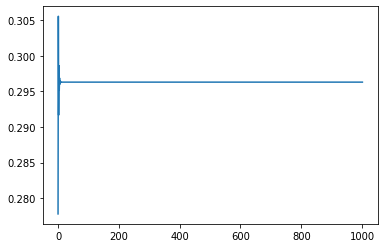

In [47]:
plt.plot(mkv_run[:,2])

In [48]:
step

1001

In [49]:
loop_left

dict_keys(['吃', '睡', '打'])

In [50]:
probability_vector = mkv_run[-1]
probability_vector[:-1]

array([0.37037037, 0.33333333])

## 联合概率

In [51]:
def joint_probability(independence):
    return np.cumproduct((independence))[-1]
joint_probability(probability_vector)

0.036579789666209415

## 条件概率

In [52]:
def conditional_probability(independence,indexA):
    product = np.cumproduct((independence))[-1]
    return product/independence[indexA]
conditional_probability(probability_vector[:-1],-1)

0.37037037037037035

## 全概率
## 条件1 ，上班选择的路线有四条，选择各条路线的概率分别为  0.1，0.3，0.5，0.1
## 条件2 ， 每条路不迟到的概率为，0.2，0.3，0.1，0.9
## 求，迟到的最大概率为

In [53]:
way = np.array([0.5,0.3,0.9])
probability_of_late = np.array([0.2,0.4,0.9])

In [54]:
def full_probability(A,B):
    return A.dot(B)
full_probability(way,probability_of_late)

1.03

## P 检验

In [55]:
def testP(A,B):
    return A*B/B == A

In [56]:
testP(way,probability_of_late)

array([ True,  True,  True])

## 贝叶斯

In [57]:
def bayes(A,B):
    PAB = A*B #联合概率 
    PA_B = PAB/B #条件概率 然似概率
    PA = A.dot(B) #全概率 
    PA_B2 = ((PAB/B)*B/PAB) #贝叶斯定理 后验概率
    return PA_B2
bayes(way,probability_of_late)

array([1., 1., 1.])

In [58]:
class bayes:
    def __init__(self,A,B,i,j):
        self.A = A
        self.B = B
        self.i = i
        self.j = j
        

    def joint_probability(self):
        PAB = self.A*self.B #联合概率
        return PAB

    def contingent_probability(self):
        PAB = self.joint_probability()
        PA_B = PAB/self.B #条件概率 
        return PA_B

    def full_probability(self):
        PA = self.A.dot(self.B) #全概率 
        return PA

    def Ptest(self):
        PA_B = self.contingent_probability()
        Ptest = ((PA_B/self.B)*self.B/PA_B) #贝叶斯定理 后验概率
        return Ptest.astype(bool)

    def bayesian_inference(self,need='A'): #贝叶斯推断
        if self.Ptest().all():
            PAB = self.joint_probability()
            if need == 'A':
                return (PAB*self.B)/self.A
            elif need == 'B':
                return (PAB*self.A)/self.A
    
    def bayesian_refresh(self,display=np.inf):
        A ,B = self.A,self.B #贝叶斯刷新
        n = 0
        bayes_factor_chain = []
        posteriori_probability_list = []
        bayes_factor = lambda a,b : a/b
        for a,b in zip(A,B):
            n +=1
            if n % display == 0:
                print(n)
            if n==1:
                a_b = np.array(A[0]).dot(B[0])/B[0]
                ptest = ((a_b/B[0])*B[0]/a_b).astype(bool).all()
                if ptest:
                    bayes_factor_chain.append(bayes_factor(a,b))
                else:
                    return ptest
            elif n>1:                 
                bayes_factor_chain.append(bayes_factor(a,b))
                posteriori_probability = bayes_factor_chain[-1]*bayes_factor_chain[-2]
                posteriori_probability_list.append(posteriori_probability)
        return posteriori_probability_list,bayes_factor_chain[0],bayes_factor_chain[1:]
            

bayesf = bayes(way,probability_of_late,0,1)

In [59]:
bayesf.Ptest()
bayesf.bayesian_inference()
#bayesf.bayesian_refresh()

array([0.04, 0.16, 0.81])

In [60]:
import requests
url = "https://cn.investing.com/rates-bonds/forward-rates"
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36 QIHU 360SE'}
html = requests.get(url,headers=headers).text
pd.read_html(html) 

[                                                   0  \
 0  EUR/USDGBP/USDUSD/JPYUSD/CHFAUD/USDEUR/GBPUSD/...   
 
                                                    1  
 0  $(document).ready(function () {  $('.js-scroll...  ,
                                            Unnamed: 0              名称  \
 0                                                 NaN   EURUSD TN FWD   
 1                                                 NaN   EURUSD SW FWD   
 2                                                 NaN   EURUSD 2W FWD   
 3                                                 NaN   EURUSD 3W FWD   
 4                                                 NaN   EURUSD 1M FWD   
 5                                                 NaN   EURUSD 2M FWD   
 6                                                 NaN   EURUSD 3M FWD   
 7                                                 NaN   EURUSD 4M FWD   
 8                                                 NaN   EURUSD 5M FWD   
 9                             